## Data from Beer Reviews

*Data*: BeerAdvocate / RateBeer / matched_beer_data

*Difference ratings-reviews*: **reviews.txt** semble être un sous-ensemble de **ratings.txt** car ce dernier a en plus la colonne review (True or False) et **reviews.txt** est l'ensemble de tous les ratings qui sont True

*Ligne to print .txt*: 
* """with open(BA_REVIEWS_DATASET, 'r', encoding='utf-8') as file:
    for _ in range(16):
        print(file.readline())"""
* """with open(BA_RATINGS_DATASET, 'r', encoding='utf-8') as file:
    for _ in range(17):
        print(file.readline())"""
* !head Data/BeerAdvocate/ratings.txt/ratings.txt

# BeerAdvocate

**beers.csv**
* beer_id
* beer_name
* brewery_id
* brewery_name
* style
* nbr_ratings
* nbr_reviews
* avg
* ba_score
* bros_score
* abv
* avg_computed
* zscore
* nbr_matched_valid_ratings
* avg_matched_valid_ratings

**breweries.csv**
* id,
* location
* name
* nbr_beers

**users.csv**
* nbr_ratings
* nbr_reviews
* user_id
* user_name
* joined
* location

**ratings.txt** (format ligne i.e. Header=None)
* beer_name
* beer_id
* brewery_name
* brewery_id
* style
* abv
* date
* user_name
* user_id
* appearance
* aroma
* palate
* taste
* overall
* rating
* text
* review: *True or False*

**reviews.txt** (format ligne i.e. Header=None, sous-ensemble de **ratings.txt**)
* beer_name
* beer_id
* brewery_name
* brewery_id
* style
* abv
* date
* user_name
* user_id
* appearance : *up to 5*
* aroma : *up to 5*
* palate : *up to 5*
* taste : *up to 5*
* overall : *up to 5*
* rating : *up to 5, unkown formula but different weights for each parameter*
* text

----------------------------------------------------------------------------------------------------

# RateBeer

*Appearance and Mouthfeel (= Palate) are each scored out of 5. Aroma and Taste are scored out of 10. While Overall is scored out of 20. These all combine to give the beer a total score out of 50, which is then divided and displayed as a score out of 5 for each rating.*

**beers.csv**
* beer_id
* beer_name
* brewery_id
* brewery_name
* style
* nbr_ratings
* overall_score
* style_score
* avg
* abv
* avg_computed
* zscore
* nbr_matched_valid_ratings
* avg_matched_valid_ratings

**breweries.csv**
* id
* location
* name
* nbr_beers

**users.csv**
* nbr_ratings
* user_id
* user_name
* joined
* location

**ratings.txt = reviews.txt** (format ligne i.e. Header=None)
* beer_name
* beer_id
* brewery_name
* brewery_id
* style
* abv
* date
* user_name
* user_id
* appearance : *up to 5*
* aroma : *up to 10*
* palate (=mouthfeel) : *up to 5*
* taste : *up to 10*
* overall : *up to 20*
* rating : *up to 50 (sum of all previous) then divided by 10 --> up to 5*
* text

----------------------------------------------------------------------------------------------------

# matched_beer_data

**beers.csv**
### ba:
* abv
* avg avg_computed
* avg_matched_valid_ratings
* ba_score
* beer_id
* beer_name
* beer_wout_brewery_name
* brewery_id
* brewery_name
* bros_score
* nbr_matched_valid_ratings
* nbr_ratings
* nbr_reviews
* style
* zscore
### rb:
* abv
* avg
* avg_computed
* avg_matched_valid_ratings
* beer_id
* beer_name
* beer_wout_brewery_name
* brewery_id
* brewery_name
* nbr_matched_valid_ratings
* nbr_ratings
* overall_score
* style
* style_score
* zscore
### scores:
* diff
* sim

**breweries.csv**
### ba:
* id
* location
* name
* nbr_beers
### rb:
* id
* location
* name
* nbr_beers
### scores:
* diff
* sim

**ratings.csv**
### ba:
* abv
* appearance
* aroma
* beer_id
* beer_name
* brewery_id
* brewery_name
* date
* overall
* palate
* rating
* review
* style
* taste
* text
* user_id
* user_name
### rb:
* abv
* appearance
* aroma
* beer_id
* beer_name
* brewery_id
* brewery_name
* date
* overall
* palate
* rating
* style
* taste
* text
* user_id
* user_name


**users_approx.csv**
### ba:
* joined
* location
* nbr_ratings
* nbr_reviews
* user_id
* user_name
* user_name_lower
### rb:
* joined
* location
* nbr_ratings
* user_id
* user_name
* user_name_lower
### scores:
* sim

**users.csv**
### ba:
* joined
* location
* nbr_ratings
* nbr_reviews
* user_id
* user_name
* user_name_lower
### rb:
* joined
* location
* nbr_ratings
* user_id
* user_name
* user_name_lower

----------------------------------------------------------------------------------------------------

# Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_FOLDER = 'C:/Users/leroy/Documents/Etudes/EPFL/Master EST/Cours/MA 1/Applied Data Analysis/bADA55-project/data/'
BEER_ADVOCATE_FOLDER = DATA_FOLDER + 'BeerAdvocate/' #BA
RATE_BEER_FOLDER = DATA_FOLDER + 'RateBeer/' #RB
MATCHED_BEER = DATA_FOLDER + 'matched_beer_data/' #MB

BA_BEERS_DATASET = BEER_ADVOCATE_FOLDER + "beers.csv"
BA_BREWERIES_DATASET = BEER_ADVOCATE_FOLDER + "breweries.csv"
BA_USERS_DATASET = BEER_ADVOCATE_FOLDER + "users.csv"
BA_RATINGS_DATASET = BEER_ADVOCATE_FOLDER + 'ratings.txt/' + "ratings.txt"
BA_REVIEWS_DATASET = BEER_ADVOCATE_FOLDER + 'reviews.txt/' + "reviews.txt"

RB_BEERS_DATASET = RATE_BEER_FOLDER + "beers.csv"
RB_BREWERIES_DATASET = RATE_BEER_FOLDER + "breweries.csv"
RB_USERS_DATASET = RATE_BEER_FOLDER + "users.csv"
RB_RATINGS_DATASET = RATE_BEER_FOLDER + 'ratings.txt/' + "ratings.txt"
RB_REVIEWS_DATASET = RATE_BEER_FOLDER + 'reviews.txt/' + "ratings.txt"

### Beer Advocate

ratings.txt != reviews.txt

ratings :
[151 074 576 lines = 151 074 576/18 reviews = 8 393 032 reviews]

reviews :
[4 4022 962 lines = 44022962/17 reviews = 2 589 586 reviews]

In [3]:
with open(BA_RATINGS_DATASET, 'r', encoding='utf-8') as file:
    line_count = sum(1 for line in file)

print(f"Number of lines: {line_count}")

Number of lines: 151074576


In [4]:
columns = ['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv', 'date', 
           'user_name', 'user_id', 'appearance', 'aroma', 'palate', 'taste', 'overall', 
           'rating', 'text']
data = []
current_entry = {}

max_entries = 10000 #must be equal 2 589 586 to have all reviews
entry_count = 0

with open(BA_REVIEWS_DATASET, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()  # Supprimer les espaces de début/fin
        if line:  # Si la ligne n'est pas vide
            if ':' in line:
                key, value = line.split(':', 1)  # Séparer la clé et la valeur
                key = key.strip()
                value = value.strip()
                current_entry[key] = value
        else:
            if current_entry:  # Si un bloc est terminé, ajouter l'entrée au dataset
                data.append(current_entry)
                current_entry = {}  # Réinitialiser pour le prochain bloc
                entry_count += 1
                if entry_count >= max_entries:  # Arrêter après 40 entrées
                    break

# Ajouter la dernière entrée si nécessaire et si le fichier ne finit pas par une ligne vide
if current_entry and entry_count < max_entries:
    data.append(current_entry)

ba_reviews = pd.DataFrame(data, columns=columns)
ba_reviews["date"] = pd.to_numeric(ba_reviews["date"])
ba_reviews["date"] = pd.to_datetime(ba_reviews["date"], unit='s').dt.strftime('%d/%m/%Y')
cols = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
ba_reviews[cols] = ba_reviews[cols].apply(pd.to_numeric, errors = 'coerce')

In [5]:
ba_beers = pd.read_csv(BA_BEERS_DATASET)
ba_breweries = pd.read_csv(BA_BREWERIES_DATASET)
ba_users = pd.read_csv(BA_USERS_DATASET)

### Rate Beer

ratings.txt = reviews.txt (i.e. no difference for this dataset)

[121 075 258 lines = 121075258/17 reviews = 7 122 074 review]

In [6]:
columns = ['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv', 'date', 
           'user_name', 'user_id', 'appearance', 'aroma', 'palate', 'taste', 'overall', 
           'rating', 'text']
data = []
current_entry = {}

max_entries = 10000 #must be equal 7 122 074 to have all reviews
entry_count = 0

with open(RB_REVIEWS_DATASET, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()  # Supprimer les espaces de début/fin
        if line:  # Si la ligne n'est pas vide
            if ':' in line:
                key, value = line.split(':', 1)  # Séparer la clé et la valeur
                key = key.strip()
                value = value.strip()
                current_entry[key] = value
        else:
            if current_entry:  # Si un bloc est terminé, ajouter l'entrée au dataset
                data.append(current_entry)
                current_entry = {}  # Réinitialiser pour le prochain bloc
                entry_count += 1
                if entry_count >= max_entries:  # Arrêter après 40 entrées
                    break

# Ajouter la dernière entrée si nécessaire et si le fichier ne finit pas par une ligne vide
if current_entry and entry_count < max_entries:
    data.append(current_entry)

rb_reviews = pd.DataFrame(data, columns=columns)
rb_reviews["date"] = pd.to_numeric(rb_reviews["date"])
rb_reviews["date"] = pd.to_datetime(rb_reviews["date"], unit='s').dt.strftime('%d/%m/%Y')
cols = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
rb_reviews[cols] = rb_reviews[cols].apply(pd.to_numeric)

In [7]:
rb_beers = pd.read_csv(RB_BEERS_DATASET)
rb_breweries = pd.read_csv(RB_BREWERIES_DATASET)
rb_users = pd.read_csv(RB_USERS_DATASET)

# Tendencies : BeerAdvocate

## Display :

## ba_beers

## ba_breweries

## ba_users

# Tendencies : Rate Beer

## Display :

In [8]:
print("rb_beers :\n")
display(rb_beers)
print("=" * 150)
print("\nrb_beweries :\n")
display(rb_breweries)
print("=" * 150)
print("\nrb_users :\n")
display(rb_users)
print("=" * 150)
print("\nrb_reviews :\n")
display(rb_reviews)

rb_beers :



,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN



rb_beweries :



,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3
...,...,...,...,...
24184,28180,Albania,Shoqeria Picana,1
24185,1107,Albania,Stefani & Co,11
24186,9355,Albania,Hotel Martini,1
24187,9928,Albania,Rozafa Brewery,1



rb_users :



,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia



rb_reviews :



,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,26/04/2016,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,17/02/2017,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,24/06/2016,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,01/01/2016,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,23/10/2015,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Amoy Bräu Black Moon 11%,335427,FatFat Beer Horse 胖胖啤酒马,21107,Imperial Stout,11.0,06/05/2016,GuideDogSaint,53015,4,8,4,8,15,3.9,On tap at Daxue Lu on 18 Nov 2015. Pours black...
9996,Amoy Bräu Cascade Pale Ale,293141,FatFat Beer Horse 胖胖啤酒马,21107,American Pale Ale,6.0,14/10/2014,GuideDogSaint,53015,3,6,3,6,12,3.0,On tap at the brew house on 11 Oct. Pours hazy...
9997,Amoy Bräu Citra Pale Ale,339181,FatFat Beer Horse 胖胖啤酒马,21107,American Pale Ale,6.5,08/06/2015,GuideDogSaint,53015,4,7,4,8,14,3.7,On tap at the Daxue Lu bar on 3 June. Pours ha...
9998,Amoy Bräu East Kent Goldings Pale Ale,313857,FatFat Beer Horse 胖胖啤酒马,21107,American Pale Ale,6.5,07/02/2015,GuideDogSaint,53015,4,7,4,7,14,3.6,"On tap at Amoy Brau, ZCA. Pours hazy golden wi..."


## rb_beers

beer_id : Identifiant unique pour chaque bière dans le dataset RateBeer.\
beer_name : Nom de la bière.\
brewery_id : Identifiant unique pour chaque brasserie associée à la bière.\
brewery_name : Nom de la brasserie qui produit la bière.\
style : Style de la bière (par exemple, Pale Lager, Stout, Pilsener), indiquant le type ou la catégorie de la bière.\
nbr_ratings : Nombre total de notes reçues pour cette bière.\
overall_score : Score global de la bière, basé sur la moyenne de toutes les évaluations des utilisateurs (peut être exprimé sur une échelle de 0 à 100).\
style_score : Score de la bière spécifique à son style (comparée aux autres bières du même type).\
avg : Note moyenne des utilisateurs pour cette bière, calculée à partir de toutes les notes reçues.\
abv : Teneur en alcool par volume (ABV) de la bière, exprimée en pourcentage.\
avg_computed : Note moyenne de la bière, i.e. moyenne des ratings (note disponible sur le site)\
zscore : Score standardisé (z-score) pour la bière, indiquant sa déviation par rapport à la moyenne des notes des autres bières (peut-être pour une normalisation statistique).\
nbr_matched_valid_ratings : Nombre de notes "valides" pour cette bière dans les données croisées (par exemple, lorsqu'on compare avec un autre dataset comme BeerAdvocate).\
avg_matched_valid_ratings : Moyenne des notes "valides" pour cette bière dans les données croisées.

In [31]:
display(rb_beers[rb_beers['nbr_ratings'] != 0].sort_values(by= 'nbr_ratings'))

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
225955,203235,Funkwerks Lemon Green Tea Saison,12024,Funkwerks,Saison,1,NaN,NaN,2.86,6.8,3.500000,NaN,0,NaN
225960,207467,Funkwerks Mango-Tea King,12024,Funkwerks,Saison,1,NaN,NaN,2.90,8.0,3.800000,NaN,0,NaN
225976,199303,Funkwerks Passionfruit Montagne,12024,Funkwerks,Saison,1,NaN,NaN,2.91,6.1,3.900000,NaN,0,NaN
225980,469704,Funkwerks Pear Saison,12024,Funkwerks,Saison,1,NaN,NaN,3.06,6.8,3.600000,0.242076,1,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432421,2530,St. Bernardus Abt 12,439,St. Bernardus Brouwerij,Abt/Quadrupel,4477,100.0,100.0,4.14,10.0,4.158566,NaN,0,NaN
427434,835,Orval,132,Brasserie dOrval,Belgian Ale,4486,99.0,100.0,3.91,6.2,3.927530,NaN,0,NaN
430399,53,Chimay Bleue (Blue) / Grande Réserve,12,Chimay,Belgian Strong Ale,4843,100.0,100.0,4.00,9.0,4.015858,NaN,0,NaN
142867,1267,Guinness Draught,13,St. Jamess Gate (Diageo),Dry Stout,5185,77.0,87.0,3.39,4.2,3.451186,NaN,0,NaN


In [27]:
with open(BA_REVIEWS_DATASET, 'r', encoding='utf-8') as file:
    for _ in range(16): print(file.readline())

beer_name: Régab

beer_id: 142544

brewery_name: Societe des Brasseries du Gabon (SOBRAGA)

brewery_id: 37262

style: Euro Pale Lager

abv: 4.5

date: 1440064800

user_name: nmann08

user_id: nmann08.184925

appearance: 3.25

aroma: 2.75

palate: 3.25

taste: 2.75

overall: 3.0

rating: 2.88

text: From a bottle, pours a piss yellow color with a fizzy white head.  This is carbonated similar to soda.The nose is basic.. malt, corn, a little floral, some earthy straw.  The flavor is boring, not offensive, just boring.  Tastes a little like corn and grain.  Hard to write a review on something so simple.Its ok, could be way worse.



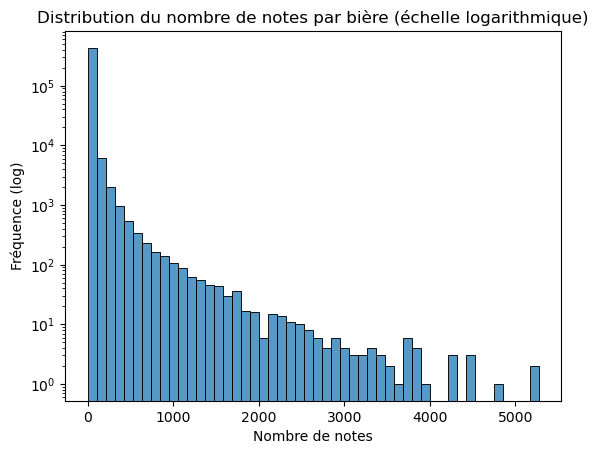

In [10]:
sns.histplot(rb_beers['nbr_ratings'], bins= 50)
plt.yscale('log')
plt.title("Distribution du nombre de notes par bière (échelle logarithmique)")
plt.xlabel("Nombre de notes")
plt.ylabel("Fréquence (log)")
plt.show()

In [11]:
unique_brewery = rb_beers.groupby('brewery_name').agg(number_beers= ('beer_id', 'count'),
                                             nbr_ratings_sum= ('nbr_ratings', 'sum'),
                                             nbr_ratings_mean= ('nbr_ratings', 'mean'),
                                             overall_score_mean= ('overall_score', 'mean'),
                                             style_score_mean= ('style_score', 'mean'),
                                             avg_mean= ('avg', 'mean'),
                                             abv_mean= ('abv', 'mean'))
display(unique_brewery)

,number_beers,nbr_ratings_sum,nbr_ratings_mean,overall_score_mean,style_score_mean,avg_mean,abv_mean
brewery_name,,,,,,,
#Freedom Craft Brewery,4,5,1.250000,NaN,NaN,2.680000,5.400000
&#40;512&#41; Brewing Company,56,1179,21.053571,86.578947,76.00,3.187321,7.115556
+39 BEER & CO,1,2,2.000000,NaN,NaN,2.660000,4.800000
"0,5 Pub",5,10,2.000000,NaN,NaN,2.946000,4.833333
10 Ants Brewing,7,20,2.857143,NaN,NaN,3.095714,5.333333
...,...,...,...,...,...,...,...
Řemeslný pivovar Husar,4,9,2.250000,NaN,NaN,2.996667,5.066667
Żywiec (Żywiec Group/Heineken),31,5111,164.870968,16.760000,41.08,2.494839,5.300000
Żywiecki Browar Rzemieślniczy Krajcar,10,12,1.200000,NaN,NaN,2.845000,5.942857


In [12]:
unique_style = rb_beers.groupby('style').agg(number_beers= ('beer_id', 'count'),
                                             nbr_ratings_sum= ('nbr_ratings', 'sum'),
                                             nbr_ratings_mean= ('nbr_ratings', 'mean'),
                                             overall_score_mean= ('overall_score', 'mean'),
                                             style_score_mean= ('style_score', 'mean'),
                                             avg_mean= ('avg', 'mean'),
                                             abv_mean= ('abv', 'mean'))
display(unique_style)

,number_beers,nbr_ratings_sum,nbr_ratings_mean,overall_score_mean,style_score_mean,avg_mean,abv_mean
style,,,,,,,
Abbey Dubbel,3004,71944,23.949401,58.072780,53.430859,3.041823,7.323595
Abbey Tripel,3905,116602,29.859667,63.430689,54.256321,3.106314,8.817297
Abt/Quadrupel,1565,66277,42.349521,82.398747,54.540710,3.245603,10.651311
Altbier,2094,29403,14.041547,50.379717,55.570755,2.987792,5.491802
Amber Ale,11664,138788,11.898834,45.494697,56.181162,2.966306,5.515832
...,...,...,...,...,...,...,...
Traditional Ale,1894,36442,19.240760,46.704545,52.926573,2.973348,5.606781
Weizen Bock,1586,32605,20.558008,65.340230,54.360920,3.094164,7.468877
Wheat Ale,7234,78242,10.815870,43.331621,59.139398,2.943141,5.215630


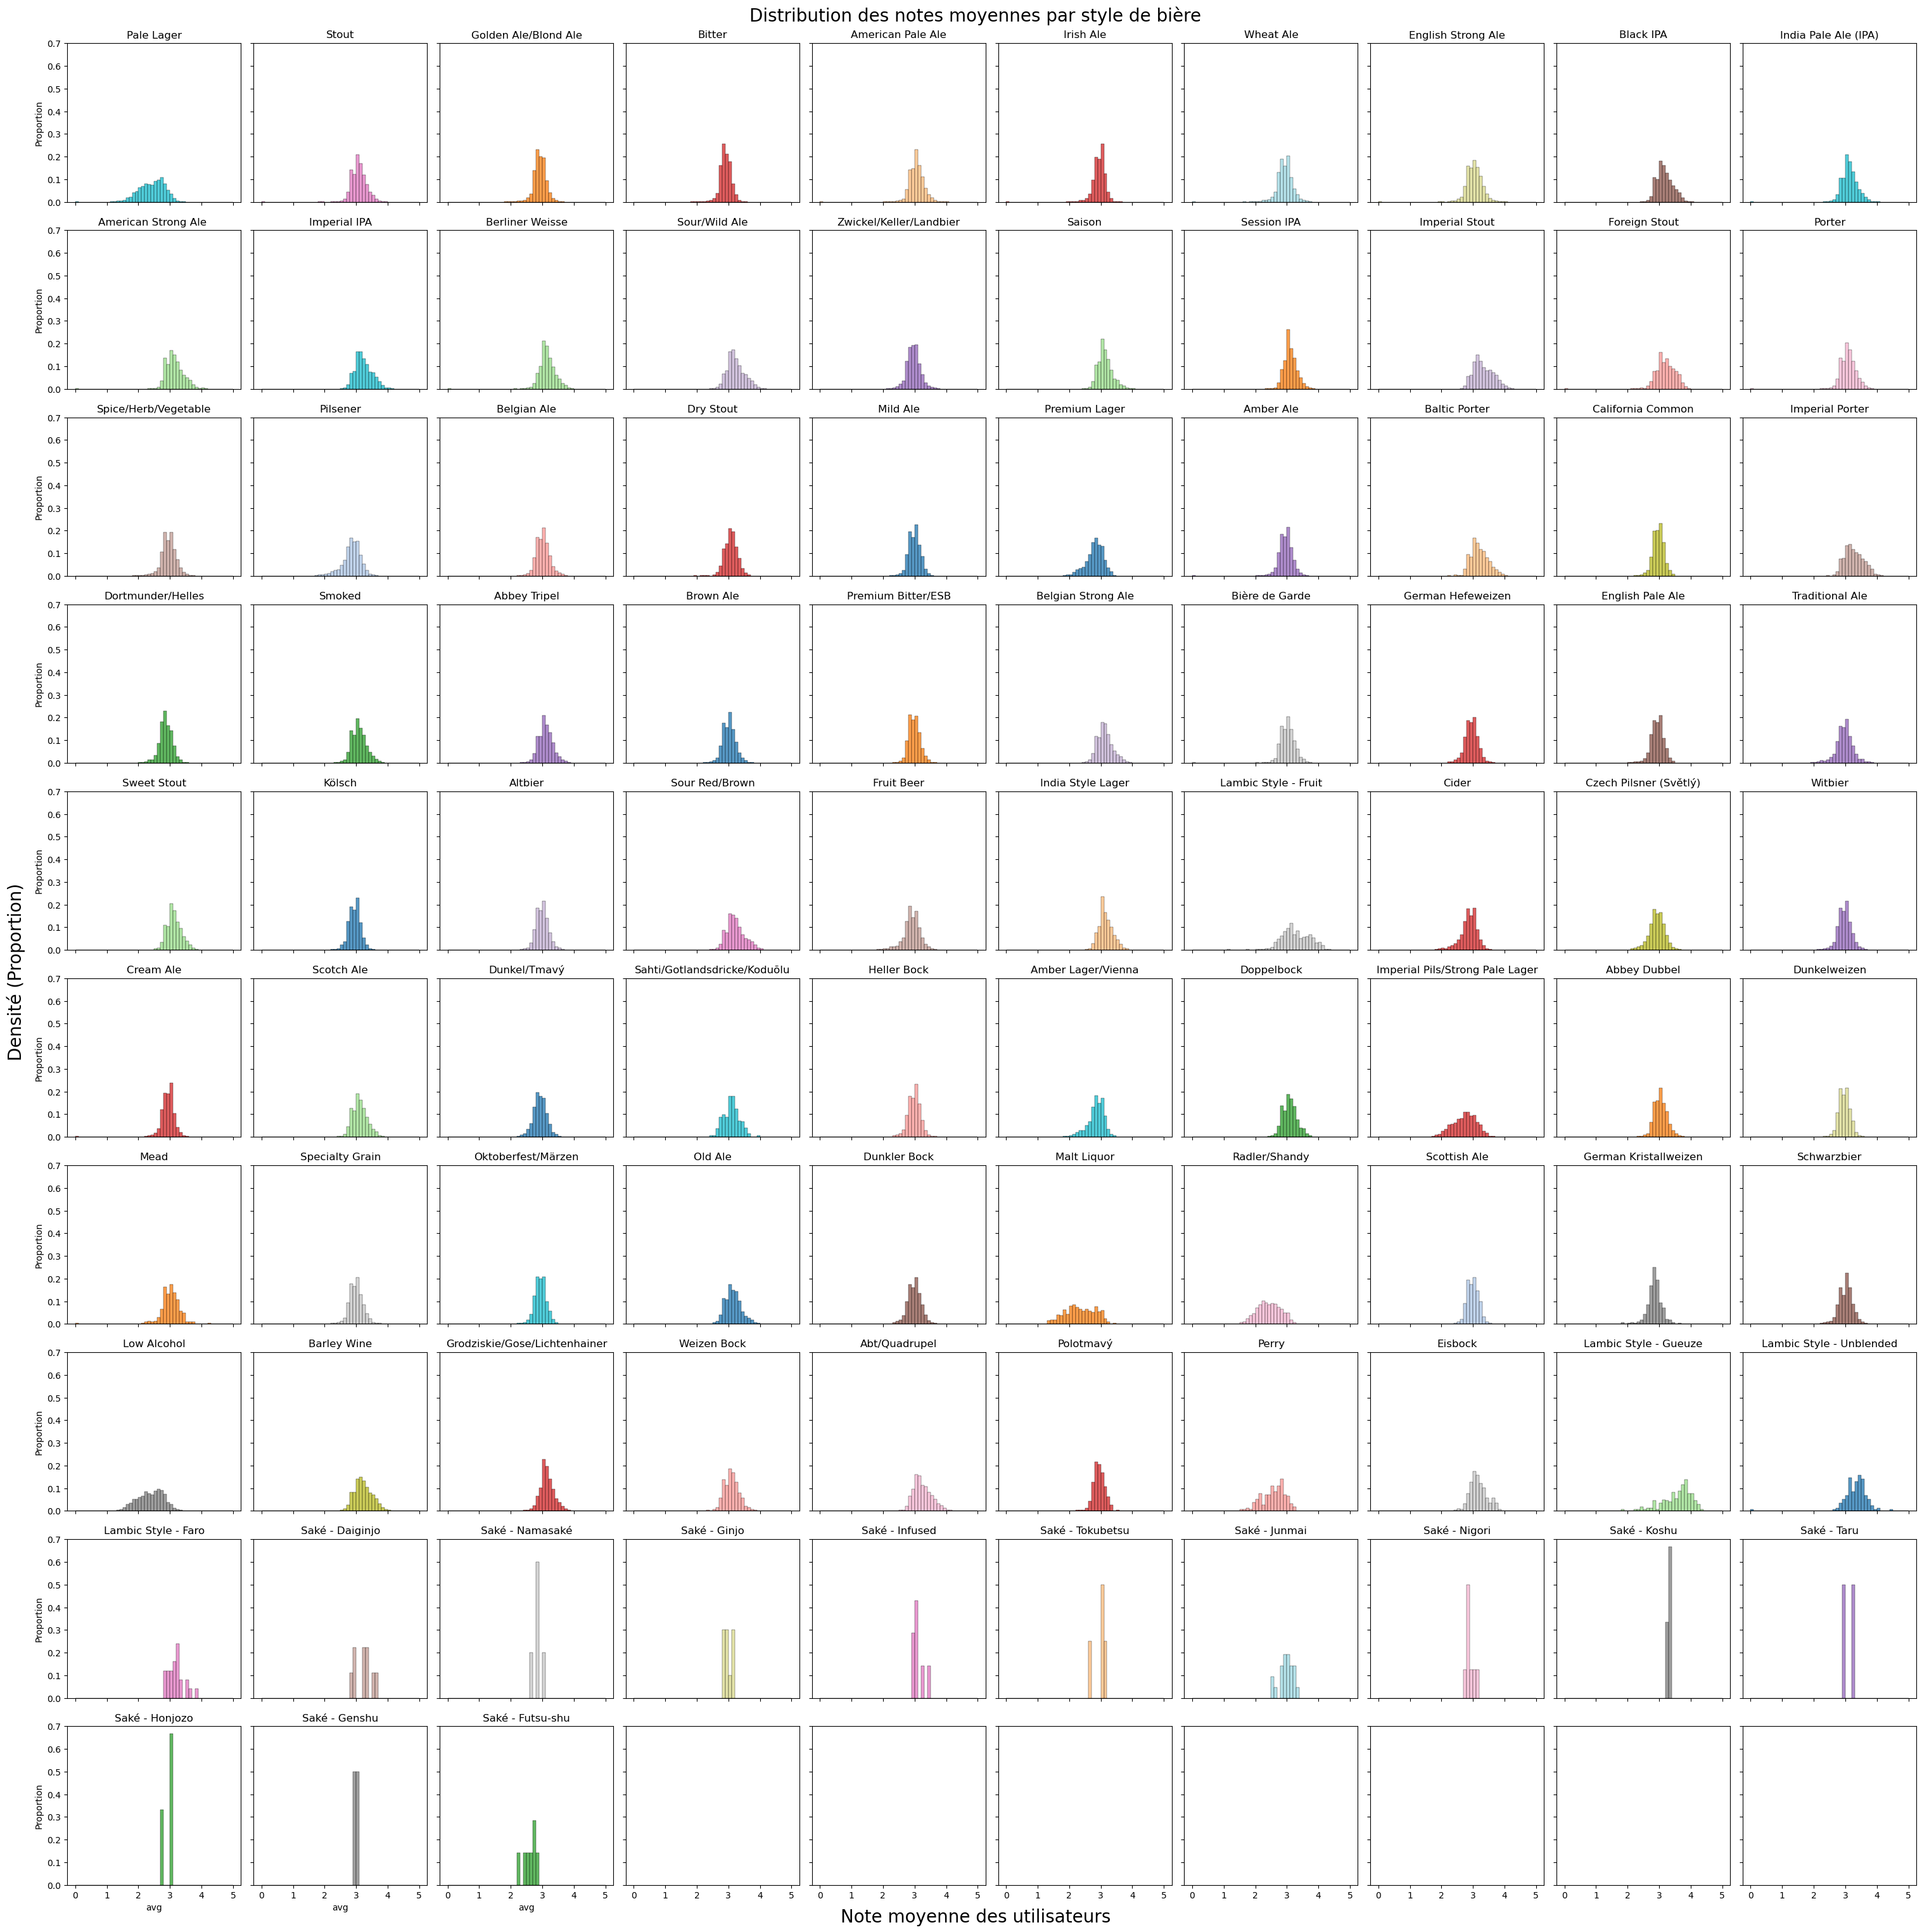

In [13]:
fig, axs = plt.subplots(10, 10, figsize=(30, 30), sharex=True, sharey=True)
cmap = plt.get_cmap('tab20')
i, j = 0, 0

for idx, name in enumerate(rb_beers['style'].unique()):
    if j == 10:
        i += 1
        j = 0
    
    style_data = rb_beers[rb_beers['style'] == name]['avg'].dropna()
    color = cmap(np.random.rand())

    if not style_data.empty:
        sns.histplot(style_data, bins= 50, binrange= [0, 5], ax= axs[i, j], stat= 'proportion', color= color)
        axs[i, j].set_title(name)
    
    j += 1

# Titres et étiquettes
fig.text(0.5, 0, 'Note moyenne des utilisateurs', ha= 'center', fontsize= 20)
fig.text(-0.01, 0.5, 'Densité (Proportion)', va= 'center', rotation= 'vertical', fontsize= 20)
fig.text(0.5, 1, 'Distribution des notes moyennes par style de bière', ha= 'center', fontsize= 20)

plt.tight_layout()
plt.show()

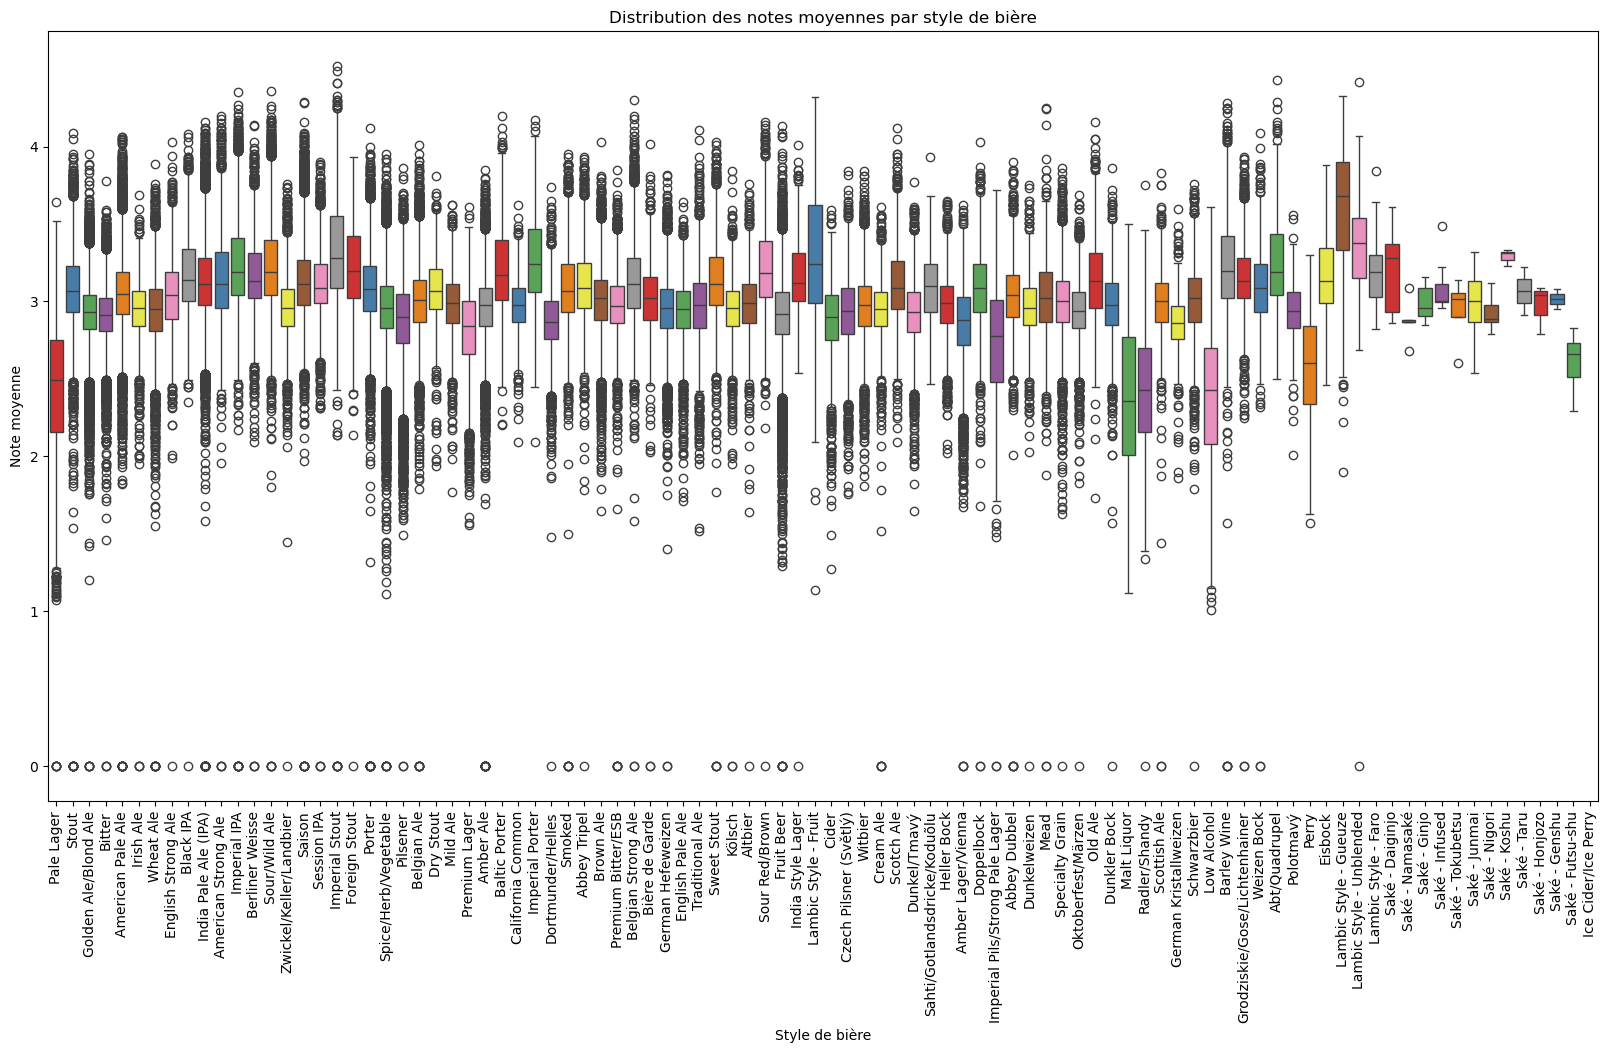

In [19]:
plt.figure(figsize= (20, 10))
sns.boxplot(data= rb_beers, x= 'style', y= 'avg', hue= 'style', palette= 'Set1')
plt.title("Distribution des notes moyennes par style de bière")
plt.xticks(rotation= 90)
plt.xlabel("Style de bière")
plt.ylabel("Note moyenne")
plt.show()

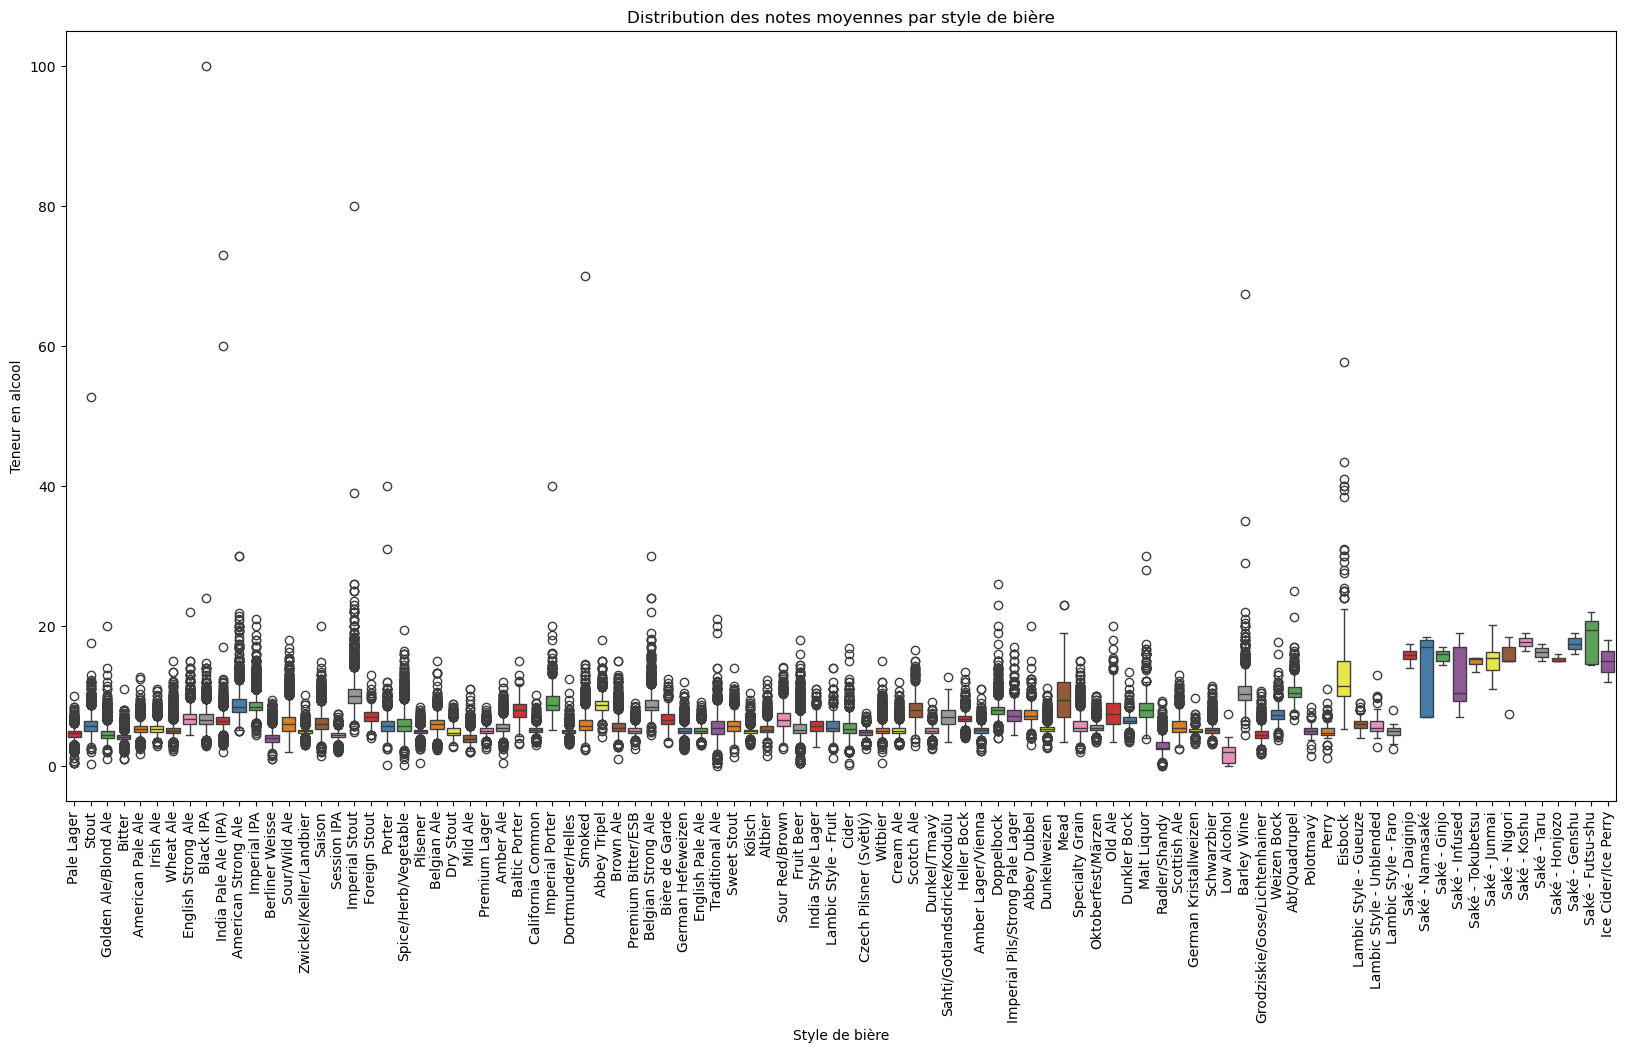

In [24]:
plt.figure(figsize= (20, 10))
sns.boxplot(data= rb_beers, x= 'style', y= 'abv', hue= 'style', palette= 'Set1')
plt.title("Distribution des notes moyennes par style de bière")
plt.xticks(rotation= 90)
plt.xlabel("Style de bière")
plt.ylabel("Teneur en alcool")
plt.show()

C:\Users\leroy\anaconda3\envs\ada\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


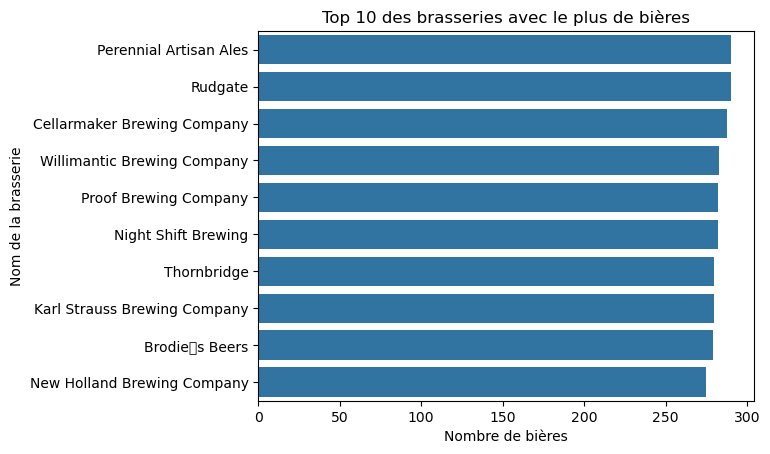

In [15]:
sns.barplot(data= unique_brewery.sort_values(ascending= False, by= 'number_beers').head(10), x= 'number_beers', y= unique_brewery.sort_values(ascending= False, by= 'number_beers').head(10).index)
plt.title("Top 10 des brasseries avec le plus de bières")
plt.xlabel("Nombre de bières")
plt.ylabel("Nom de la brasserie")
plt.show()

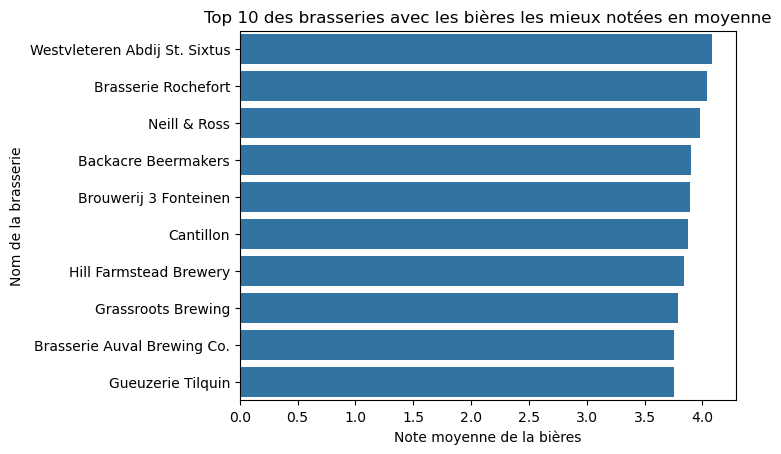

In [16]:
sns.barplot(data= unique_brewery.sort_values(ascending= False, by= 'avg_mean').head(10), x= 'avg_mean', y= unique_brewery.sort_values(ascending= False, by= 'avg_mean').head(10).index)
plt.title("Top 10 des brasseries avec les bières les mieux notées en moyenne")
plt.xlabel("Note moyenne de la bières")
plt.ylabel("Nom de la brasserie")
plt.show()

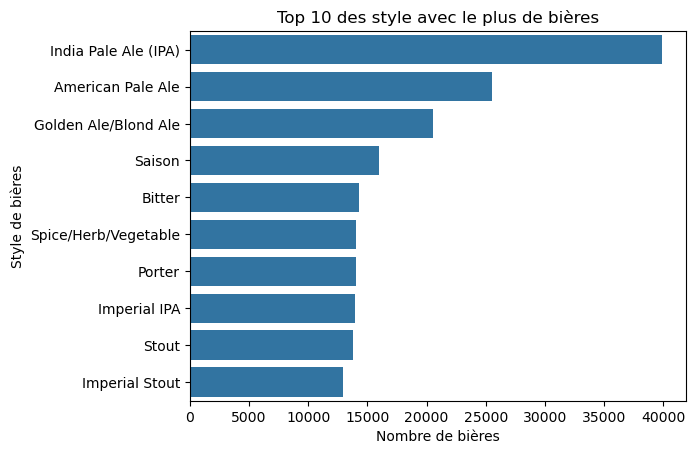

In [17]:
sns.barplot(data= unique_style.sort_values(ascending= False, by= 'number_beers').head(10), x= 'number_beers', y= unique_style.sort_values(ascending= False, by= 'number_beers').head(10).index)
plt.title("Top 10 des style avec le plus de bières")
plt.xlabel("Nombre de bières")
plt.ylabel("Style de bières")
plt.show()

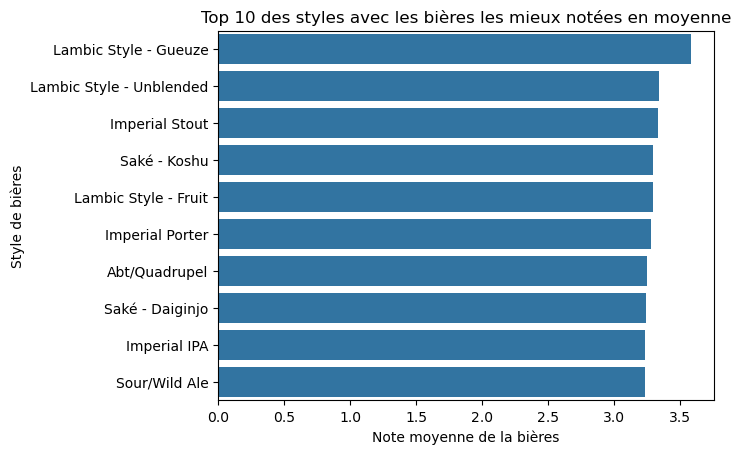

In [18]:
sns.barplot(data= unique_style.sort_values(ascending= False, by= 'avg_mean').head(10), x= 'avg_mean', y= unique_style.sort_values(ascending= False, by= 'avg_mean').head(10).index)
plt.title("Top 10 des styles avec les bières les mieux notées en moyenne")
plt.xlabel("Note moyenne de la bières")
plt.ylabel("Style de bières")
plt.show()

## rb_breweries

## rb_users